逻辑回归

In [1]:
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)

In [2]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [41]:
import pandas as pd
from mord import LogisticAT

# Read CSV file
data = pd.read_csv('data5.csv')

# Ensure the target variable '婴儿行为特征' is treated as an ordered categorical variable
data['婴儿行为特征'] = pd.Categorical(data['婴儿行为特征'], ordered=True)

# Convert the ordered categorical values to integer codes
y = data['婴儿行为特征'].cat.codes

# Define the independent variables (features)
X = data[['CBTS', 'EPDS', 'HADS']]

# Execute ordered logistic regression
model = LogisticAT(alpha=0)  # alpha=0 indicates no L2 regularization
model.fit(X, y)

# Print results
print("Coefficients:", model.coef_)

Coefficients: [-0.01254332  0.03278311  0.02034976]


偏最小二乘法

In [3]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression

# 从CSV文件读取数据
data = pd.read_csv('data5.csv')

# 分离自变量和因变量
X = data[['CBTS', 'EPDS', 'HADS']].values
y = data['婴儿行为特征'].values

# 计算自变量的均值和标准差
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# 对自变量进行标准化处理
X_normalized = (X - mean_X) / std_X

# 使用偏最小二乘-判别分析建立模型
pls_model = PLSRegression(n_components=2)  # 这里选择2个主成分，也可以根据需要调整
pls_model.fit(X_normalized, y)

# 查看模型的系数
print("回归系数:")
print(pls_model.coef_)

# 查看模型的截距
print("截距:")
print(pls_model.intercept_)

回归系数:
[[-0.01931822]
 [ 0.0583066 ]
 [ 0.03833677]]
截距:
[0.81052632]


d:\anaconda\envs\naasi_env\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


用线性规划解决如下问题:
y=−0.01931822×x1+0.0583066×x2+0.03833677×x3+0.81052632
-0.009 0.029  0.023  
保留到小数点后两位
目标函数:w=870.67 x_1+690 x_2 + 2,440 x_3+1000的最小值

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mord import LogisticAT

# Step 1: 读取数据
data = pd.read_csv("data5.csv")

# Step 2: 数据预处理
# 去除无关列
# data = data.drop(columns=["编号", "婴儿行为特征", "婴儿性别", "婴儿年龄（月）", "整晚睡眠时间（时：分：秒）", "睡醒次数", "入睡方式", "评分标准", "睡眠质量"])
# 将自变量和因变量分开
X = data[["CBTS", "EPDS", "HADS"]]
y = data["婴儿行为特征"]

# Step 3: 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: 使用有序逻辑多分类回归
model = LogisticAT(alpha=1.0)
model.fit(X_train, y_train)

# Step 5: 输出结果
print("回归系数:", model.coef_)
# print("截距:", model.intercept_)
print("因变量分类阈值:", model.theta_)

# 注意：因为没有完整的数据，上面的代码只是一个示例框架，具体运行时请根据实际数据进行修改。


回归系数: [-0.012512    0.03278136  0.03579829]
因变量分类阈值: [-0.37851498  2.62070127]


这个是从矛盾到中等

In [53]:
import pulp

# 创建线性规划问题
lp_problem = pulp.LpProblem("Minimize_w", pulp.LpMinimize)

# 定义决策变量
x1 = pulp.LpVariable("x1", 0, 30, cat='Integer')
x2 = pulp.LpVariable("x2", 0, 30, cat='Integer')
x3 = pulp.LpVariable("x3", 0, 30, cat='Integer')
xC = pulp.LpVariable("xC", 0, 15, cat='Integer')
xE = pulp.LpVariable("xE", 0, 22, cat='Integer')
xH = pulp.LpVariable("xH", 0, 18, cat='Integer')

y1 = 870.67 * x1 + 200
y2 = 690 * x2 + 500
y3 = 2440 * x3 + 300
y = -0.02 * xC + 0.06 * xE + 0.04 * xH + 0.81

# 定义目标函数
lp_problem += y1 + y2 + y3, "Minimize_w"

# 定义约束条件
lp_problem += y <= 1.5
lp_problem += x1 == 15 - xC
lp_problem += x2 == 22 - xE
lp_problem += x3 == 18 - xH

# 求解问题
lp_problem.solve()

# 输出结果
print("最小值w的取值为:", pulp.value(lp_problem.objective))
print("x1的取值为:", pulp.value(x1))
print("x2的取值为:", pulp.value(x2))
print("x3的取值为:", pulp.value(x3))

最小值w的取值为: 13420.0
x1的取值为: 0.0
x2的取值为: 18.0
x3的取值为: 0.0


这个是从矛盾到安静型

In [20]:
import pulp

# 创建线性规划问题
lp_problem = pulp.LpProblem("Minimize_w", pulp.LpMinimize)

# 定义决策变量
x1 = pulp.LpVariable("x1", 0, 30, cat='Integer')
x2 = pulp.LpVariable("x2", 0, 30, cat='Integer')
x3 = pulp.LpVariable("x3", 0, 30, cat='Integer')
xC = pulp.LpVariable("xC", 0, 15, cat='Integer')
xE = pulp.LpVariable("xE", 0, 22, cat='Integer')
xH = pulp.LpVariable("xH", 0, 18, cat='Integer')

y1 = 870.67 * x1 + 200
y2 = 690 * x2 + 500
y3 = 2440 * x3 + 300
y = -0.02 * xC + 0.06 * xE + 0.04 * xH + 0.81

# 定义目标函数
lp_problem += y1 + y2 + y3, "Minimize_w"

# 定义约束条件
lp_problem += y <= 0.5

lp_problem += x1 == 15 - xC
lp_problem += x2 == 22 - xE
lp_problem += x3 == 18 - xH

# 求解问题
lp_problem.solve()

# 输出结果
print("最小值w的取值为:", pulp.value(lp_problem.objective))
print("x1的取值为:", pulp.value(x1))
print("x2的取值为:", pulp.value(x2))
print("x3的取值为:", pulp.value(x3))

最小值w的取值为: 60710.0
x1的取值为: 0.0
x2的取值为: 22.0
x3的取值为: 18.25


In [55]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('data2.csv')

# 获取婴儿行为特征为0的行
behavior_0 = df[df['婴儿行为特征'] == 0]

# 计算CBTS, EPDS和HADS的均值、中位数、众数和方差
cbts_mean_0 = behavior_0['CBTS'].mean()
cbts_median_0 = behavior_0['CBTS'].median()
cbts_mode_0 = behavior_0['CBTS'].mode().values[0]
cbts_var_0 = behavior_0['CBTS'].var()

epds_mean_0 = behavior_0['EPDS'].mean()
epds_median_0 = behavior_0['EPDS'].median()
epds_mode_0 = behavior_0['EPDS'].mode().values[0]
epds_var_0 = behavior_0['EPDS'].var()

hads_mean_0 = behavior_0['HADS'].mean()
hads_median_0 = behavior_0['HADS'].median()
hads_mode_0 = behavior_0['HADS'].mode().values[0]
hads_var_0 = behavior_0['HADS'].var()

# 获取婴儿行为特征为1的行
behavior_1 = df[df['婴儿行为特征'] == 1]

# 计算CBTS, EPDS和HADS的均值、中位数、众数和方差
cbts_mean_1 = behavior_1['CBTS'].mean()
cbts_median_1 = behavior_1['CBTS'].median()
cbts_mode_1 = behavior_1['CBTS'].mode().values[0]
cbts_var_1 = behavior_1['CBTS'].var()

epds_mean_1 = behavior_1['EPDS'].mean()
epds_median_1 = behavior_1['EPDS'].median()
epds_mode_1 = behavior_1['EPDS'].mode().values[0]
epds_var_1 = behavior_1['EPDS'].var()

hads_mean_1 = behavior_1['HADS'].mean()
hads_median_1 = behavior_1['HADS'].median()
hads_mode_1 = behavior_1['HADS'].mode().values[0]
hads_var_1 = behavior_1['HADS'].var()

# 获取婴儿行为特征为2的行
behavior_2 = df[df['婴儿行为特征'] == 2]

# 计算CBTS, EPDS和HADS的均值、中位数、众数和方差
cbts_mean_2 = behavior_2['CBTS'].mean()
cbts_median_2 = behavior_2['CBTS'].median()
cbts_mode_2 = behavior_2['CBTS'].mode().values[0]
cbts_var_2 = behavior_2['CBTS'].var()

epds_mean_2 = behavior_2['EPDS'].mean()
epds_median_2 = behavior_2['EPDS'].median()
epds_mode_2 = behavior_2['EPDS'].mode().values[0]
epds_var_2 = behavior_2['EPDS'].var()

hads_mean_2 = behavior_2['HADS'].mean()
hads_median_2 = behavior_2['HADS'].median()
hads_mode_2 = behavior_2['HADS'].mode().values[0]
hads_var_2 = behavior_2['HADS'].var()

# 输出结果
print("婴儿行为特征为0的行：")
print("CBTS均值：", cbts_mean_0, "CBTS中位数：", cbts_median_0, "CBTS众数：", cbts_mode_0, "CBTS方差：", cbts_var_0)
print("EPDS均值：", epds_mean_0, "EPDS中位数：", epds_median_0, "EPDS众数：", epds_mode_0, "EPDS方差：", epds_var_0)
print("HADS均值：", hads_mean_0, "HADS中位数：", hads_median_0, "HADS众数：", hads_mode_0, "HADS方差：", hads_var_0)

print("\n婴儿行为特征为1的行：")
print("CBTS均值：", cbts_mean_1, "CBTS中位数：", cbts_median_1, "CBTS众数：", cbts_mode_1, "CBTS方差：", cbts_var_1)
print("EPDS均值：", epds_mean_1, "EPDS中位数：", epds_median_1, "EPDS众数：", epds_mode_1, "EPDS方差：", epds_var_1)
print("HADS均值：", hads_mean_1, "HADS中位数：", hads_median_1, "HADS众数：", hads_mode_1, "HADS方差：", hads_var_1)

print("\n婴儿行为特征为2的行：")
print("CBTS均值：", cbts_mean_2, "CBTS中位数：", cbts_median_2, "CBTS众数：", cbts_mode_2, "CBTS方差：", cbts_var_2)
print("EPDS均值：", epds_mean_2, "EPDS中位数：", epds_median_2, "EPDS众数：", epds_mode_2, "EPDS方差：", epds_var_2)
print("HADS均值：", hads_mean_2, "HADS中位数：", hads_median_2, "HADS众数：", hads_mode_2, "HADS方差：", hads_var_2)


婴儿行为特征为0的行：
CBTS均值： 5.353448275862069 CBTS中位数： 4.0 CBTS众数： 0 CBTS方差： 25.778335832083954
EPDS均值： 8.189655172413794 EPDS中位数： 6.5 EPDS众数： 3 EPDS方差： 44.45067466266867
HADS均值： 7.258620689655173 HADS中位数： 6.0 HADS众数： 5 HADS方差： 19.323838080959526

婴儿行为特征为1的行：
CBTS均值： 6.240909090909091 CBTS中位数： 5.0 CBTS众数： 0 CBTS方差： 25.48964300539643
EPDS均值： 9.295454545454545 EPDS中位数： 7.5 EPDS众数： 5 EPDS方差： 46.199979244499794
HADS均值： 8.072727272727272 HADS中位数： 7.5 HADS众数： 5 HADS方差： 17.903362391033625

婴儿行为特征为2的行：
CBTS均值： 6.590909090909091 CBTS中位数： 6.5 CBTS众数： 4 CBTS方差： 22.386892177589854
EPDS均值： 11.022727272727273 EPDS中位数： 10.5 EPDS众数： 10 EPDS方差： 46.580866807610995
HADS均值： 8.75 HADS中位数： 8.0 HADS众数： 5 HADS方差： 18.796511627906977


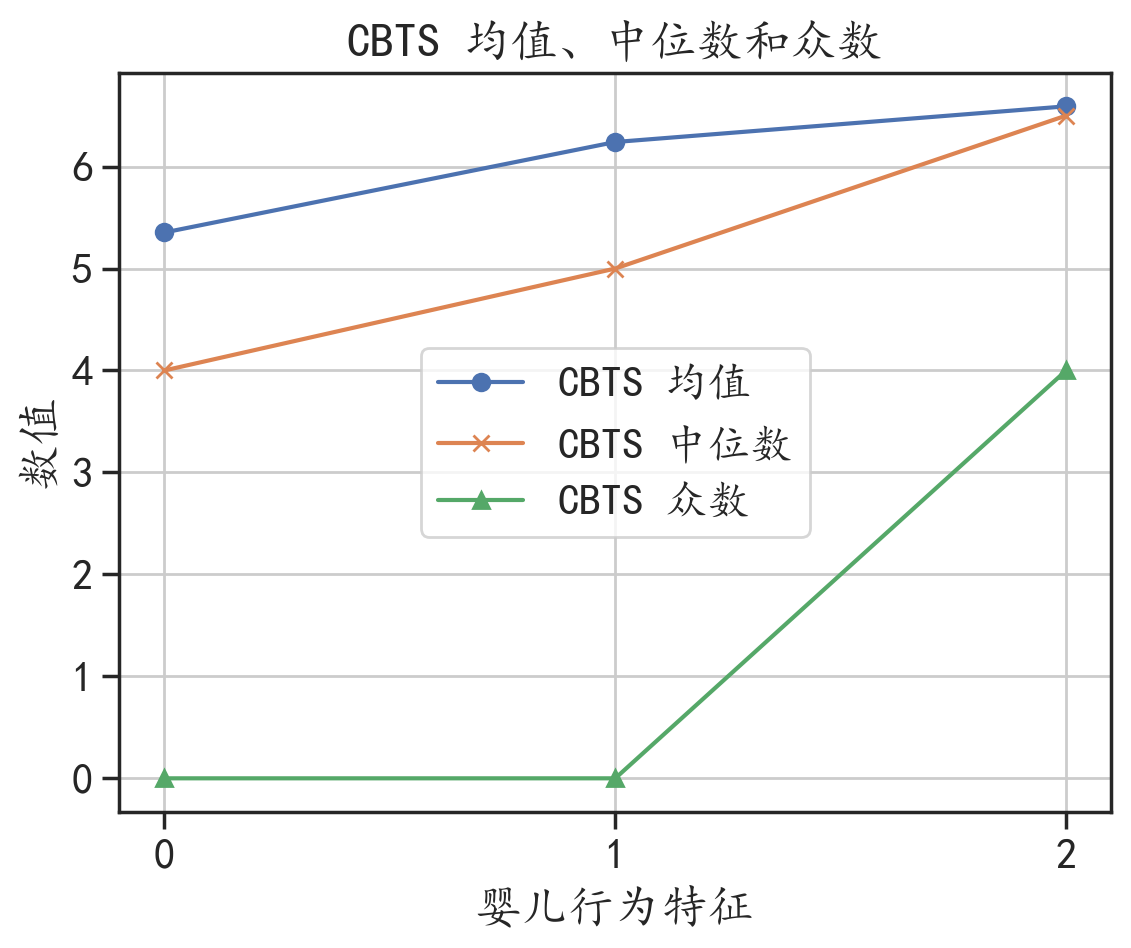

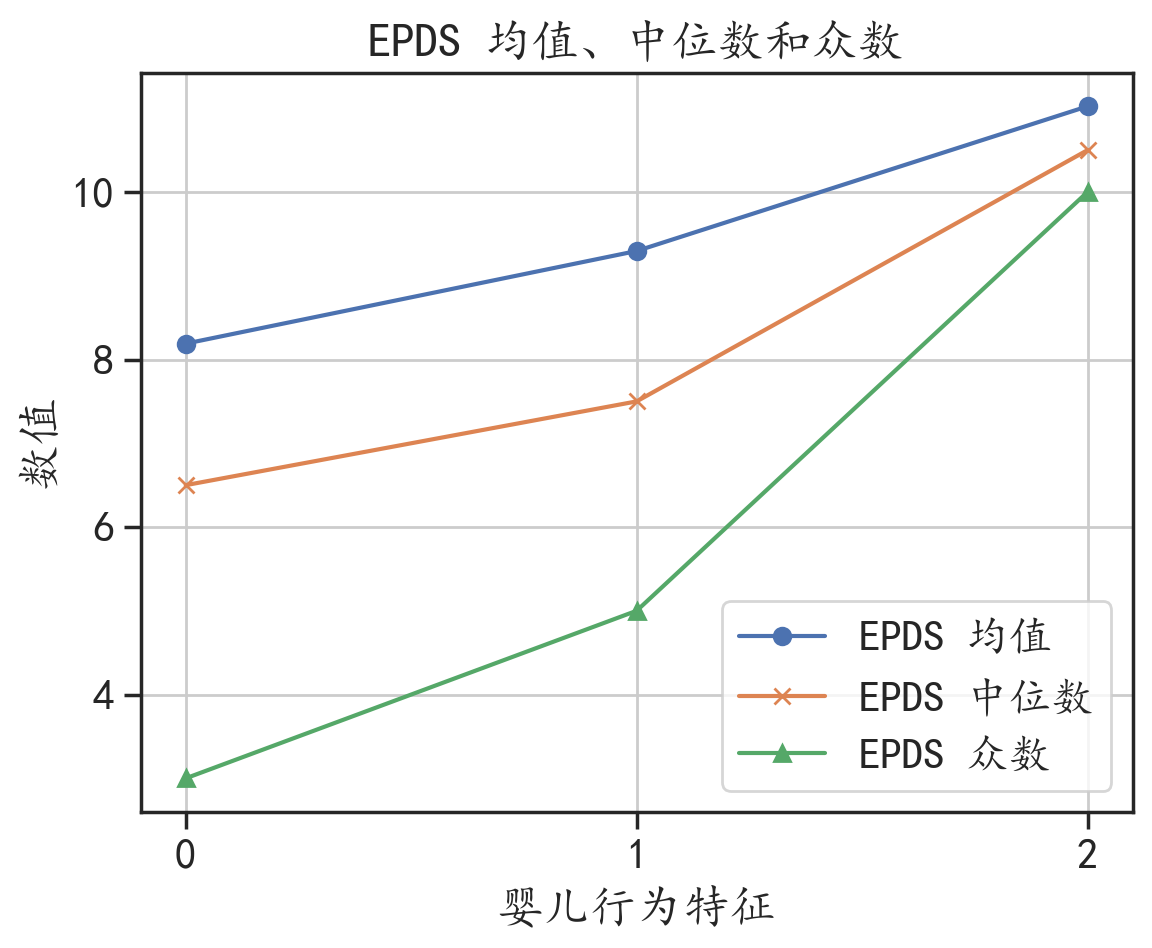

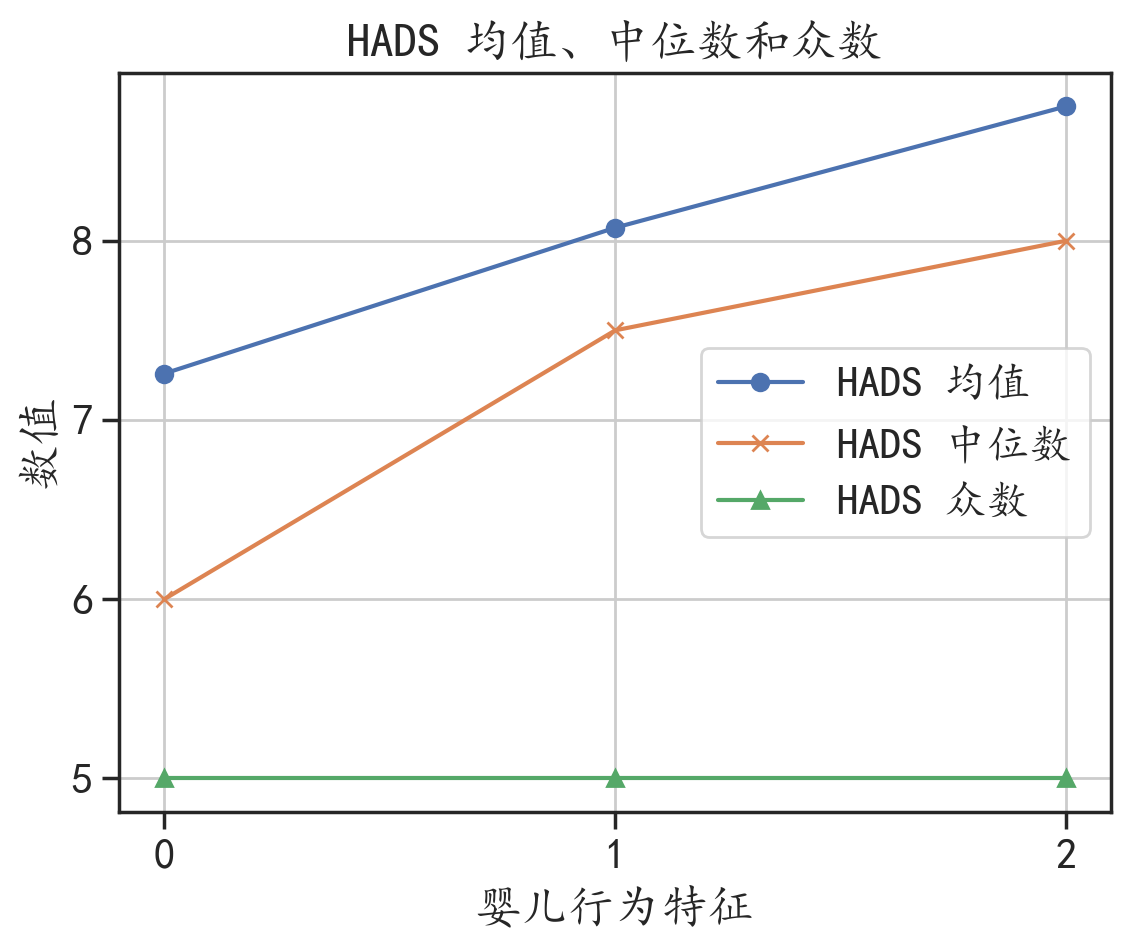

In [63]:
# 读取CSV文件
df = pd.read_csv('data2.csv')

# 获取婴儿行为特征为0, 1, 2的行
behavior_0 = df[df['婴儿行为特征'] == 0]
behavior_1 = df[df['婴儿行为特征'] == 1]
behavior_2 = df[df['婴儿行为特征'] == 2]

# 计算CBTS, EPDS和HADS的均值、中位数和众数
cbts_mean = [behavior_0['CBTS'].mean(), behavior_1['CBTS'].mean(), behavior_2['CBTS'].mean()]
cbts_median = [behavior_0['CBTS'].median(), behavior_1['CBTS'].median(), behavior_2['CBTS'].median()]
cbts_mode = [behavior_0['CBTS'].mode().values[0], behavior_1['CBTS'].mode().values[0], behavior_2['CBTS'].mode().values[0]]

epds_mean = [behavior_0['EPDS'].mean(), behavior_1['EPDS'].mean(), behavior_2['EPDS'].mean()]
epds_median = [behavior_0['EPDS'].median(), behavior_1['EPDS'].median(), behavior_2['EPDS'].median()]
epds_mode = [behavior_0['EPDS'].mode().values[0], behavior_1['EPDS'].mode().values[0], behavior_2['EPDS'].mode().values[0]]

hads_mean = [behavior_0['HADS'].mean(), behavior_1['HADS'].mean(), behavior_2['HADS'].mean()]
hads_median = [behavior_0['HADS'].median(), behavior_1['HADS'].median(), behavior_2['HADS'].median()]
hads_mode = [behavior_0['HADS'].mode().values[0], behavior_1['HADS'].mode().values[0], behavior_2['HADS'].mode().values[0]]

# 绘制CBTS图表
labels = ['0', '1', '2']
plt.plot(labels, cbts_mean, label='CBTS 均值', marker='o')
plt.plot(labels, cbts_median, label='CBTS 中位数', marker='x')
plt.plot(labels, cbts_mode, label='CBTS 众数', marker='^')

plt.xlabel('婴儿行为特征')
plt.ylabel('数值')
plt.title('CBTS 均值、中位数和众数')
plt.legend()
plt.grid(True)
plt.show()

# 绘制EPDS图表
plt.plot(labels, epds_mean, label='EPDS 均值', marker='o')
plt.plot(labels, epds_median, label='EPDS 中位数', marker='x')
plt.plot(labels, epds_mode, label='EPDS 众数', marker='^')

plt.xlabel('婴儿行为特征')
plt.ylabel('数值')
plt.title('EPDS 均值、中位数和众数')
plt.legend()
plt.grid(True)
plt.show()

# 绘制HADS图表
plt.plot(labels, hads_mean, label='HADS 均值', marker='o')
plt.plot(labels, hads_median, label='HADS 中位数', marker='x')
plt.plot(labels, hads_mode, label='HADS 众数', marker='^')

plt.xlabel('婴儿行为特征')
plt.ylabel('数值')
plt.title('HADS 均值、中位数和众数')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#中位数最可观，采用中位数

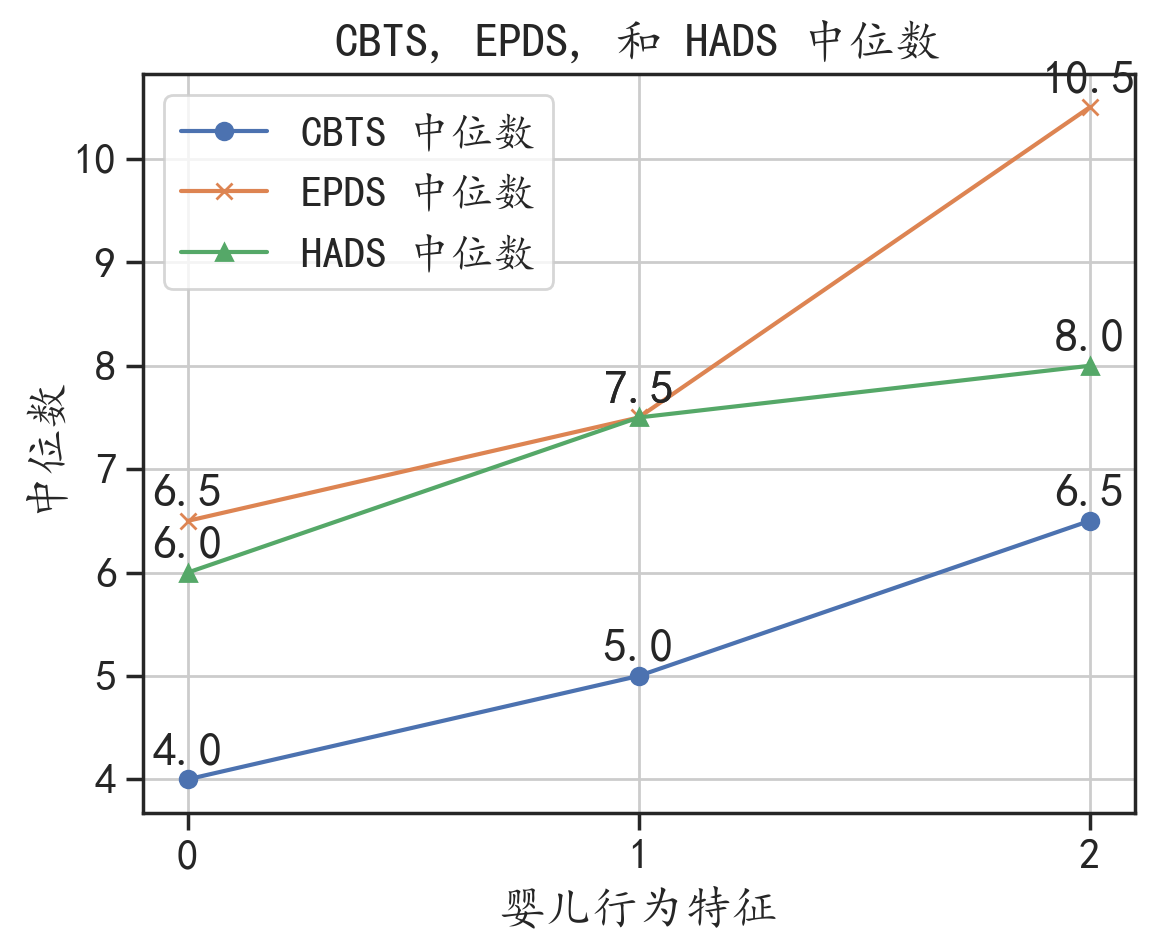

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


# 读取CSV文件
df = pd.read_csv('data2.csv')

# 获取婴儿行为特征为0, 1, 2的行
behavior_0 = df[df['婴儿行为特征'] == 0]
behavior_1 = df[df['婴儿行为特征'] == 1]
behavior_2 = df[df['婴儿行为特征'] == 2]

# 计算CBTS, EPDS和HADS的中位数
cbts_median = [behavior_0['CBTS'].median(), behavior_1['CBTS'].median(), behavior_2['CBTS'].median()]
epds_median = [behavior_0['EPDS'].median(), behavior_1['EPDS'].median(), behavior_2['EPDS'].median()]
hads_median = [behavior_0['HADS'].median(), behavior_1['HADS'].median(), behavior_2['HADS'].median()]

# 绘制中位数图表
labels = ['0', '1', '2']
plt.plot(labels, cbts_median, label='CBTS 中位数', marker='o')
plt.plot(labels, epds_median, label='EPDS 中位数', marker='x')
plt.plot(labels, hads_median, label='HADS 中位数', marker='^')

# 在图上显示具体的中位数数值
for i, txt in enumerate(cbts_median):
    plt.annotate(txt, (labels[i], cbts_median[i]), textcoords="offset points", xytext=(0,5), ha='center')
for i, txt in enumerate(epds_median):
    plt.annotate(txt, (labels[i], epds_median[i]), textcoords="offset points", xytext=(0,5), ha='center')
for i, txt in enumerate(hads_median):
    plt.annotate(txt, (labels[i], hads_median[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('婴儿行为特征')
plt.ylabel('中位数')
plt.title('CBTS, EPDS, 和 HADS 中位数')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pulp

# Create a linear programming problem
prob = pulp.LpProblem("Minimize w", pulp.LpMinimize)

# Variables
x1 = pulp.LpVariable("x1", lowBound=0, upBound=30, cat="Integer")
x2 = pulp.LpVariable("x2", lowBound=0, upBound=30, cat="Integer")
x3 = pulp.LpVariable("x3", lowBound=0, upBound=30, cat="Integer")

# Objective function
y1 = 870.67 * x1 + 200
y2 = 690 * x2 + 500
y3 = 2440 * x3 + 300

w = y1 + y2 + y3

# Constraints
prob += 15 - x1 <= 5
prob += 22 - x2 <= 7.5
prob += 18 - x3 <= 7.5

# Set the objective function to minimize
prob += w

# Solve the problem
prob.solve()

# Check if the problem has an optimal solution
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Solution Found:")
    print(f"x1: {x1.varValue}, y1: {y1.value()},")
    print(f"x2: {x2.varValue}, y2: {y2.value()},")
    print(f"x3: {x3.varValue}, y3: {y3.value()},")
    print(f"w = {w.value()}")
else:
    print("No optimal solution found.")

Optimal Solution Found:
x1: 10.0, y1: 8906.699999999999,
x2: 15.0, y2: 10850.0,
x3: 11.0, y3: 27140.0,
w = 46896.7


In [7]:
import pulp

# Create a linear programming problem
prob = pulp.LpProblem("Minimize w", pulp.LpMinimize)

# Variables
x1 = pulp.LpVariable("x1", lowBound=0, upBound=30, cat="Integer")
x2 = pulp.LpVariable("x2", lowBound=0, upBound=30, cat="Integer")
x3 = pulp.LpVariable("x3", lowBound=0, upBound=30, cat="Integer")

# Objective function
y1 = 870.67 * x1 + 200
y2 = 690 * x2 + 500
y3 = 2440 * x3 + 300

w = y1 + y2 + y3

# Constraints
prob += 15 - x1 <= 4
prob += 22 - x2 <= 6.5
prob += 18 - x3 <= 6

# Set the objective function to minimize
prob += w

# Solve the problem
prob.solve()

# Check if the problem has an optimal solution
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Solution Found:")
    print(f"x1: {x1.varValue}, y1: {y1.value()},")
    print(f"x2: {x2.varValue}, y2: {y2.value()},")
    print(f"x3: {x3.varValue}, y3: {y3.value()},")
    print(f"w = {w.value()}")
else:
    print("No optimal solution found.")

Optimal Solution Found:
x1: 11.0, y1: 9777.369999999999,
x2: 16.0, y2: 11540.0,
x3: 12.0, y3: 29580.0,
w = 50897.369999999995


In [5]:
import cvxpy as cp

# Define variables
x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()

# Define the objective function
objective_function = cp.Minimize(200 * cp.exp(0.88 * (15 - x1)) +
                                 500 * cp.exp(0.66 * (22 - x2)) +
                                 300 * cp.exp(0.75 * (18 - x3)))

# Define the updated constraints
constraints = [x1 >= 0, x1 <= 4,         
               x2 >= 0, x2 <= 6.5,      
               x3 >= 0, x3 <= 6]       

problem = cp.Problem(objective_function, constraints)
result = problem.solve(solver=cp.SCS, verbose=True)

# Output results
print("Optimal value of x1:", x1.value)
print("Optimal value of x2:", x2.value)
print("Optimal value of x3:", x3.value)
print("Optimal value of the objective function:", result)

# # Create the problem and solve
# problem = cp.Problem(objective_function, constraints)
# result = problem.solve()

# # Output results
# print("Optimal value of x1:", x1.value)
# print("Optimal value of x2:", x2.value)
# print("Optimal value of x3:", x3.value)
# print("Optimal value of the objective function:", result)


                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Aug 06 06:22:44 PM: Your problem has 3 variables, 6 constraints, and 0 parameters.
(CVXPY) Aug 06 06:22:44 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 06 06:22:44 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 06 06:22:44 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 06 06:22:44 PM: Compiling problem (target solver=SCS).
(CVXPY) Aug 06 06:22:44 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> S